In [92]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import random 
import math
%config InlineBackend.figure_format ='retina' 

### Задание 1.

Сгенерируйте выборку $X_1, ..., X_N$ из стандартного нормального распределения для
$N = 10^4.$ Для всех $n\leq N$ посчитайте по ней эмпирическую
функцию распределения. Для некоторых $n$ (например, $n \in \{10, 25,
50, 100, 1000, N\}$) постройте графики эмпи\-рической функции
распределения (отметьте на оси абсцисс точки "скачков" кривых,
нанеся каждую из "подвыборок" на ось абсцисс на каждом
соответствующем графике с коэффициентом прозрачности 0.2), нанеся на
каждый из них истинную функцию распределения (количество графиков
равно количеству различныз значений $n$). 

Будет полезно: https://matplotlib.org/stable/gallery/lines_bars_and_markers/step_demo.html

(Должна получиться картина, как в конце презентации https://edu.tinkoff.ru/course/181/unit/5064/view)

In [93]:
from scipy.stats import norm, uniform

In [94]:
Y = norm.rvs(size=1000)
Y_s = np.sort(Y)
X = np.arange(0,1,0.001)


In [95]:
def funer(data, n): 
    fun = []
    for i in range(n):
        fun.append(data[i])
    return fun


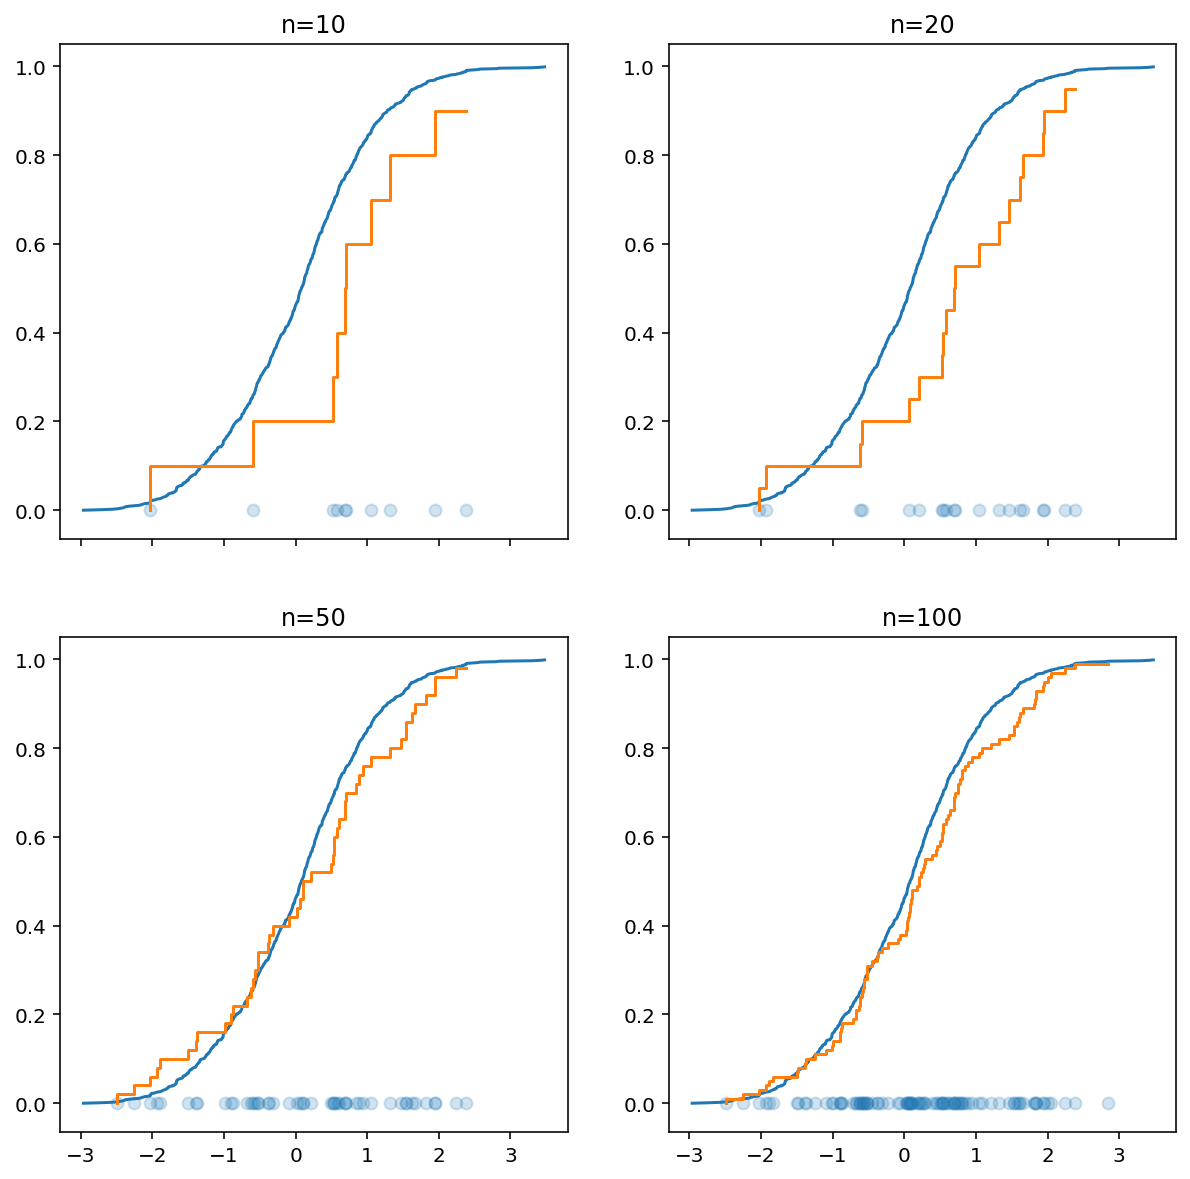

In [96]:
fig, axs = plt.subplots(2, 2, sharex=True,figsize=(10, 10))

axs[0][0].plot(Y_s,X)
axs[0][0].step(np.sort(funer(Y,10)),np.arange(0,1, 0.1))
axs[0][0].set_title('n=10')
axs[0][0].scatter(funer(Y,10), np.zeros(10), alpha=0.2)

axs[0][1].plot(Y_s,X)
axs[0][1].step(np.sort(funer(Y,20)),np.arange(0,1, 0.05))
axs[0][1].set_title('n=20')
axs[0][1].scatter(funer(Y,20), np.zeros(20), alpha=0.2)


axs[1][0].plot(Y_s,X)
axs[1][0].step(np.sort(funer(Y,50)),np.arange(0,1, 0.02))
axs[1][0].set_title('n=50')
axs[1][0].scatter(funer(Y,50), np.zeros(50), alpha=0.2)


axs[1][1].plot(Y_s,X)
axs[1][1].step(np.sort(funer(Y,100)),np.arange(0,1, 0.01))
axs[1][1].set_title('n=100')
axs[1][1].scatter(funer(Y,100), np.zeros(100), alpha=0.2)



plt.show()

### Задание 2. Задача Бюффона о бросании иглы

Классическая формулировка задачи выглядит так:

На разлинованный лист бумаги, расстояния между линиями $r=1$ бросают иглы длиной $L < r$. Какова вероятность того, что игла попадет на линию? 

Для этой задачи существует теоретическое решение:

$$p = \dfrac{2L}{r\pi}\ \ \ \ \ (1)$$.

**Задание**

Проведем эксперимент, найдем вероятность пересечения иглой линии из эксперимента. С помощью теоретического решения найдем значение числа $\pi$.

https://ru.wikipedia.org/wiki/Задача_Бюффона_о_бросании_иглы

Сгенерируем две случайные величины $X1$ и $Y1$ из равномерного распределения. Это будут координаты одно из концов иглы. Сгенерируем случайную величину $\alpha$ из $U[0, 2\pi]$, она будет отвечать за угол между иглой и горизонтальной осью. Так как длина иглы $L$ задана изначально, то координаты конца иглы:

$$X_2 = X_1 + L \cdot \cos(\alpha)$$
$$Y_2 = Y_1 + L \cdot \sin(\alpha)$$

Отобразите на полотне отрезки, соответсвующие каждой игле. Проведите горизонтальные линии, пригодится https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hlines.html. (Должна получиться картина, как в конце презентации https://edu.tinkoff.ru/course/181/unit/5064/view)

Так как расстояние между горизонтальными линиями 1, то пересечение иглы с линией можно найти так: спроецируем иглы на вертикальную ось, получим отрезки $[y_2, y_1]$. Если в пределах отрезка $[y_2, y_1]$ лежит целое число, значит проекция, а соотвественно и игла, пересекают горизонтальную ось. Найдем долю игл, пересекающий горизонтальную линию. Эта доля и будет оценкой вероятности в формуле (1). Зная вероятность, из формулы (1) можно выразить значение числа $\pi$.


In [121]:
n = 100
L = 0.5
Y1 = uniform.rvs(size=n, loc=1, scale=9)
X1 = uniform.rvs(size=n, loc=1, scale=9)
alpha = uniform.rvs(size=n, loc=0, scale = np.pi * 2)
X2 = X1 + L * np.cos(alpha)
Y2 = Y1 + L * np.sin(alpha)

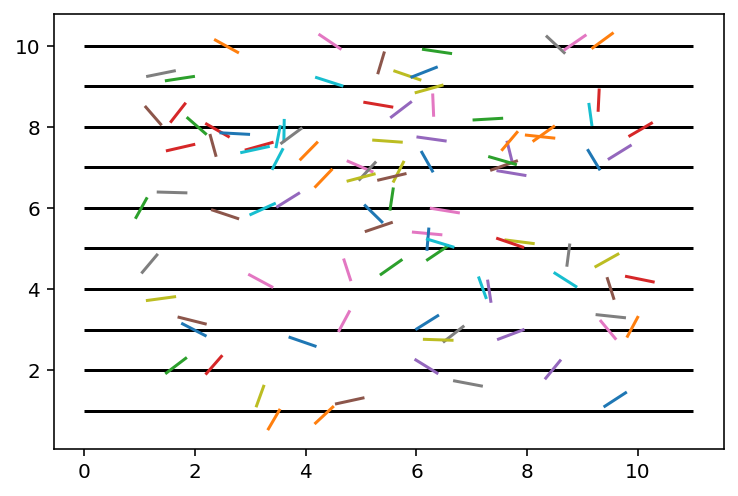

In [122]:
for i in range(n):
    plt.plot((X1[i],X2[i]), (Y1[i],Y2[i]))
plt.hlines([1,2,3,4,5,6,7,8,9,10],0,11)
plt.show()

In [108]:
k = 0 
r = 1
for j in range(n):
    if (int(Y2[j]) - int(Y1[j])) != 0:
       k+=1 

P = k/n
print('Вероятность =',P)

pi = (2 * L) / (r * P)
print('pi =',pi)

Вероятность = 0.33
pi = 3.0303030303030303
